In [97]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

In [162]:
outc = atmsrf.read_ccc(pl.Path('/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/ccc/2026/tbl20260102_0660.ccc'), raisefilterfunctionerror=False,)

In [157]:
%matplotlib widget

In [163]:
outc.dataset

<xarray.Dataset> Size: 108kB
Dimensions:                 (datetime: 613, channel: 6)
Coordinates:
  * datetime                (datetime) datetime64[ns] 5kB 2026-01-02T13:59:00...
  * channel                 (channel) int64 48B 415 500 1625 670 870 940
Data variables:
    solar_elevation         (datetime) float64 5kB -0.08614 ... -0.08496
    instrument_temperature  (datetime) float64 5kB 45.57 45.57 ... 45.55 45.55
    instrument_power        (datetime) float64 5kB 12.89 12.89 ... 12.89 12.89
    global_horizontal       (datetime, channel) float64 29kB nan nan ... nan nan
    diffuse_horizontal      (datetime, channel) float64 29kB nan nan ... nan nan
    direct_normal           (datetime, channel) float64 29kB nan nan ... nan nan
Attributes:
    info:             Cosine corrected SURFRAD MFRSR measurments.
    site_latitude:    40.12498
    site_longitude:   -105.2368
    site_elevation:   1689
    site_name:        Table Mountain
    site:             tbl
    instrument_type:  MFRSR
    serial_no:        660
    calfile_path:     None
    product_name:     raw
    product_version:  1.0

1


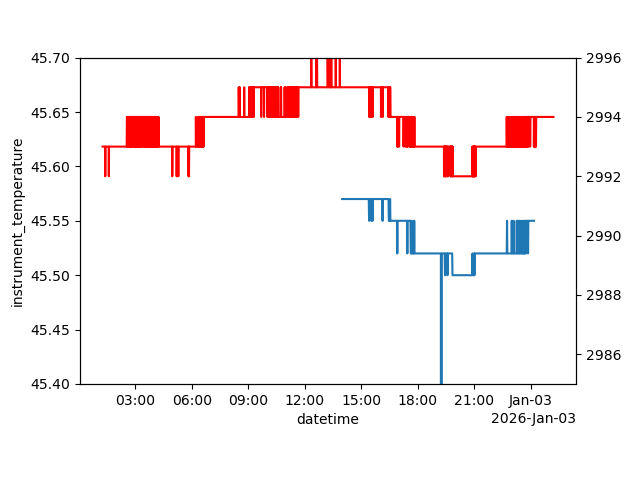

In [165]:
f,a = plt.subplots()
outc.dataset.instrument_temperature.plot(ax= a)
a.set_ylim(45.4,45.7)

at = a.twinx()
i = 1
# i +=1
print(i)
df[i].plot(ax = at, color = 'red')
at.set_ylim(2985, 2996)
plt.gcf().show()

In [166]:
import math
def tempcal(val):
    srt = 6810.0 * (5000.0 / val - 1.0)
    ln = math.log(srt)
    srt = 1.030852e-3 + 2.389179e-4 * ln + 1.574641e-7 * (ln ** 3)
    srt = 1.0 / srt - 273.12
    return srt
tempcal(2995)


45.56862743982839

In [168]:
row = df.iloc[0]

In [171]:
df.apply(lambda row: tempcal(row[1]), axis = 1)

datetime
2026-01-02 01:15:00    45.522561
2026-01-02 01:15:20    45.522561
2026-01-02 01:15:40    45.522561
2026-01-02 01:16:00    45.522561
2026-01-02 01:16:20    45.522561
                         ...    
2026-01-03 01:11:40    45.545591
2026-01-03 01:12:00    45.545591
2026-01-03 01:12:20    45.545591
2026-01-03 01:12:40    45.545591
2026-01-03 01:13:00    45.545591
Length: 4301, dtype: float64

In [143]:
f'{2995:X}'

'BB3'

In [189]:
%matplotlib inline

9


<Axes: xlabel='datetime'>

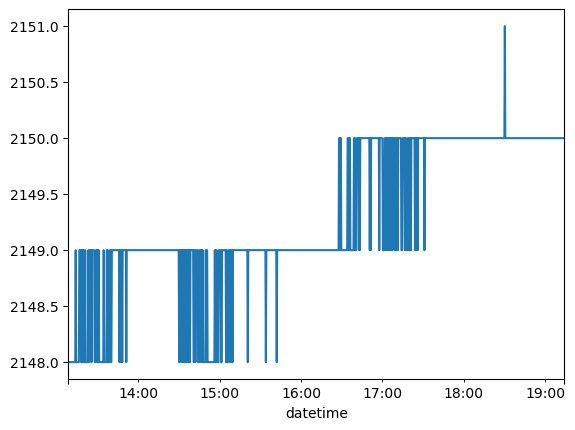

In [193]:
f,a = plt.subplots()
i = 9
# i +=1
print(i)
out.tp_df[i].plot()

In [2]:
import surfradpy.file_io.mfrsr as srp_fio

In [197]:
reload(srp_fio)

<module 'surfradpy.file_io.mfrsr' from '/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py'>

In [198]:
out1 = srp_fio.open_rsr('/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260102_010919.xmd')
out2 = srp_fio.open_rsr('/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260102_060727.xmd')
out3 = srp_fio.open_rsr('/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260102_121507.xmd')
out4 = srp_fio.open_rsr('/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260102_181332.xmd')

In [199]:
out1.dataset, out2.dataset, out3.dataset, out4.dataset, 
None

In [200]:
outs = [out1, out2,out3, out4]

In [201]:
ds = xr.concat([out.dataset for out in outs], 'datetime')

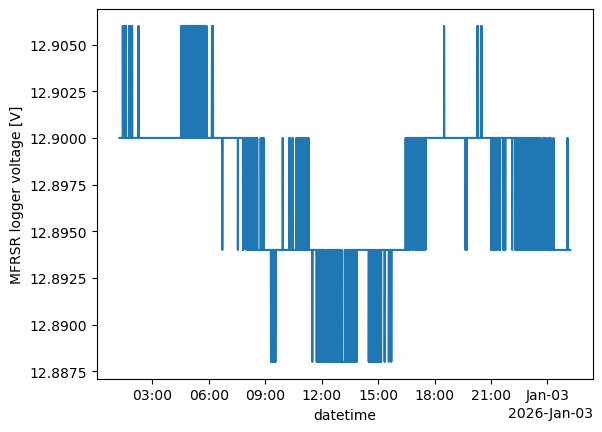

In [203]:
f,a = plt.subplots()
# ds.instrument_temperature.plot()
ds.logger_voltage.plot()

In [149]:
df = pd.concat([out.tp_df for out in outs])

1


<Axes: xlabel='datetime'>

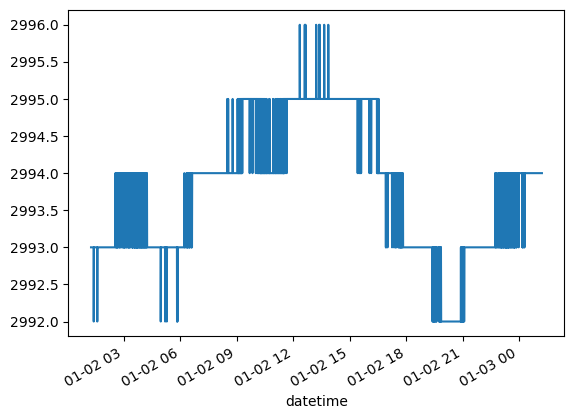

In [151]:
i = 1
# i +=1
print(i)
df[i].plot()

2


<Axes: xlabel='datetime'>

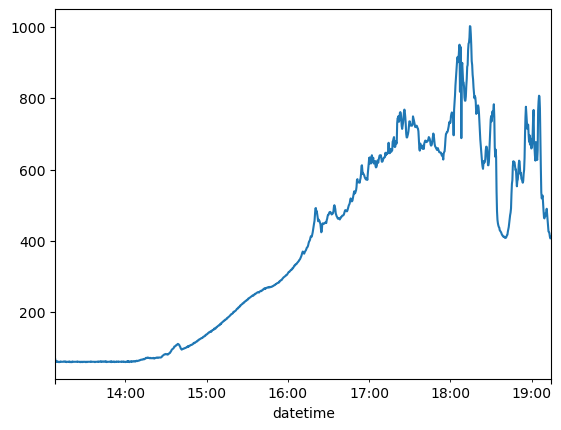

In [96]:
# i = 0
i +=1
print(i)
out.tp_df[i].plot()

1


<Axes: xlabel='datetime'>

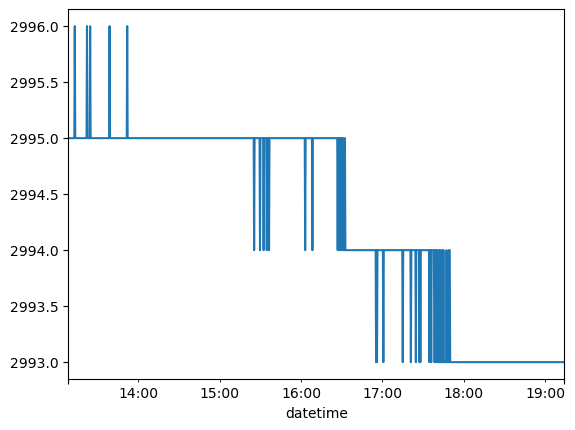

In [142]:
i = 1
# i +=1
print(i)
out.tp_df[i].plot()

10


<Axes: xlabel='datetime'>

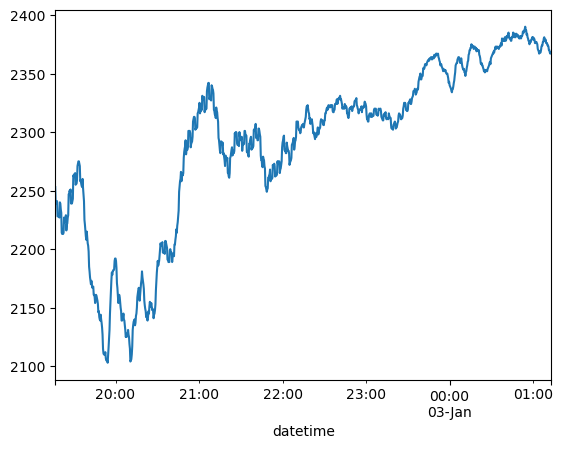

In [65]:
# i = 0
# i +=1
print(i)
out.tp_df[i].plot()

In [28]:
i

10

In [29]:
i

10

# where did the files come from?

see in [project readme](https://docs.google.com/document/d/13-J5MWXlG0roOZlPx-JJGdY-1gGSRZGEr9mswHriGUo/edit?pli=1&tab=t.0)

# Convert files

In [1]:
import surfradpy.mfr_raw2netcdf as mfr_r2nc

In [26]:
reload(mfr_r2nc)
reload(mfr_r2nc.atmsrf)

<module 'atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad' from '/Users/htelg/prog/atm-py/atmPy/data_archives/NOAA_ESRL_GMD_GRAD/surfrad/surfrad.py'>

In [27]:
prefix = '/Users/htelg/'

ci = mfr_r2nc.MfrsrRawToNetcdf(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialnumber}}',
                      f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialnumber}}.netcdf/v{{version}}/',
                      'frc_{serialnumber}_{year}{month}{day}.nc',
                      serialnumber = '648',
                      verbose = True
                          )

In [28]:
list(ci.path_in.iterdir())

[PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20250928_1524.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/.DS_Store'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251001_1053.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251013_1507.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251021_1038.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20250929_1536.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20250925_0000.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251002_1538.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251003_1100.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20251010_1505.xmd'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/

In [29]:
ci.masterplan

opening file /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/648_20250925.xmd ... done
1


{'raw_files':                                                p2f_in                  fname
 12  /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...       648_20250925.xmd
 5   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20250925_0000.xmd
 0   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20250928_1524.xmd
 4   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20250929_1536.xmd
 1   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251001_1053.xmd
 6   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251002_1538.xmd
 7   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251003_1100.xmd
 13  /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251006_1028.xmd
 11  /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251008_1446.xmd
 9   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251009_1520.xmd
 8   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...  648_20251010_1505.xmd
 2   /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20

In [30]:
ci.workplan

No rawfiles have been processe yet, start from the beginning


,p2f_in,fname
12,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20250925.xmd
5,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20250925_0000.xmd
0,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20250928_1524.xmd
4,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20250929_1536.xmd
1,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251001_1053.xmd
6,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251002_1538.xmd
7,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251003_1100.xmd
13,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251006_1028.xmd
11,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251008_1446.xmd
9,/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/20...,648_20251009_1520.xmd


In [31]:
ci.process()

............................

<xarray.Dataset> Size: 445kB
Dimensions:             (datetime: 1917, channel: 7)
Coordinates:
  * datetime            (datetime) datetime64[ns] 15kB 2025-10-21 ... 2025-10...
  * channel             (channel) int64 56B 0 1 2 3 4 5 6
Data variables:
    alltime             (datetime, channel) int64 107kB 9 0 0 4 ... 283 739 503
    global_horizontal   (datetime, channel) float64 107kB nan nan ... 503.0
    diffuse_horizontal  (datetime, channel) float64 107kB nan nan ... 375.0
    direct_normal       (datetime, channel) float64 107kB nan nan ... 241.2
Attributes: (12/15)
    site_longitude:         -350.161743
    site_latitude:          46.807251
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    serial_no:              BF4F
    measurement_sequenc:    20, 20, 20
    instrument_type:        mfrsr
    day_complete:           False
    parent_files:           /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/...
    product_version:        0.1

In [32]:
ci = mfr_r2nc.MfrsrRawToNetcdf(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialnumber}}',
                      f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialnumber}}.netcdf/v{{version}}/',
                      'frc_{serialnumber}_{year}{month}{day}.nc',
                      serialnumber = '649',
                      verbose = True
                          )
ds = ci.process()

opening file /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649/649_20250925.xmd ... done
1
No rawfiles have been processe yet, start from the beginning
...............................

# Lets plots some 

In [39]:
%matplotlib inline

In [37]:
ds = xr.open_mfdataset(pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.netcdf/v0.1').glob('*.nc'))

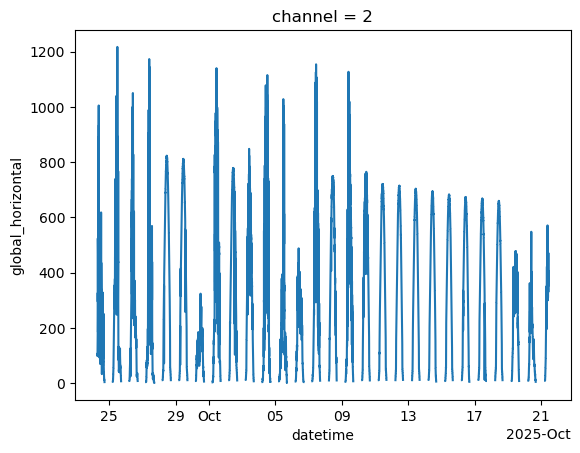

In [41]:
f,a = plt.subplots()
ds.global_horizontal.sel(channel = 2).plot.line(x = 'datetime', ax = a)

In [44]:
ds = xr.open_mfdataset(pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.netcdf/v0.1').glob('*.nc'))

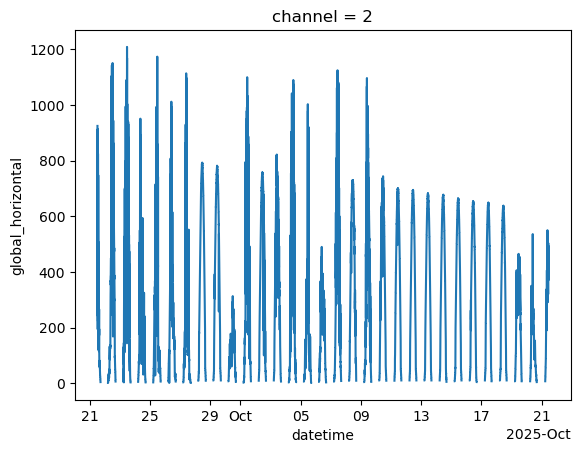

In [45]:
ds.global_horizontal.sel(channel = 2).plot.line(x = 'datetime')